In [1]:
import pandas as pd

In [17]:
TTC_Delay_BUS = pd.read_excel('ttc-bus-delay-data-2023.xlsx')
TTC_Delay_BUS

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,2023-01-01,91,02:30,Sunday,WOODBINE AND MORTIMER,Diversion,81,111,NaN,8772
1,2023-01-01,69,02:34,Sunday,WARDEN STATION,Security,22,44,S,8407
2,2023-01-01,35,03:06,Sunday,JANE STATION,Cleaning - Unsanitary,30,60,N,1051
3,2023-01-01,900,03:14,Sunday,KIPLING STATION,Security,17,17,NaN,3334
4,2023-01-01,85,03:43,Sunday,MEADOWALE LOOP,Security,1,1,NaN,1559
...,...,...,...,...,...,...,...,...,...,...
56202,2023-12-31,41,01:26,Sunday,KEELE AND EGLINTON,Operations - Operator,28,53,N,1133
56203,2023-12-31,94,01:31,Sunday,CASTLE FRANK STATION,Emergency Services,10,20,NaN,8415
56204,2023-12-31,63,01:40,Sunday,OAKWOOD AND VAUGHAN,Diversion,33,43,N,7010
56205,2023-12-31,34,01:54,Sunday,EGLINTON STATION,Emergency Services,0,0,N,8761


In [18]:
len(TTC_Delay_BUS[TTC_Delay_BUS['Min Delay']==0])/len(TTC_Delay_BUS)

0.0816624263881723

In [19]:
TTC_Delay_BUS = TTC_Delay_BUS[TTC_Delay_BUS['Min Delay']>0]
TTC_Delay_BUS

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,2023-01-01,91,02:30,Sunday,WOODBINE AND MORTIMER,Diversion,81,111,NaN,8772
1,2023-01-01,69,02:34,Sunday,WARDEN STATION,Security,22,44,S,8407
2,2023-01-01,35,03:06,Sunday,JANE STATION,Cleaning - Unsanitary,30,60,N,1051
3,2023-01-01,900,03:14,Sunday,KIPLING STATION,Security,17,17,NaN,3334
4,2023-01-01,85,03:43,Sunday,MEADOWALE LOOP,Security,1,1,NaN,1559
...,...,...,...,...,...,...,...,...,...,...
56201,2023-12-31,960,00:24,Sunday,STEELES AND VILLAGE GA,Mechanical,10,20,E,7118
56202,2023-12-31,41,01:26,Sunday,KEELE AND EGLINTON,Operations - Operator,28,53,N,1133
56203,2023-12-31,94,01:31,Sunday,CASTLE FRANK STATION,Emergency Services,10,20,NaN,8415
56204,2023-12-31,63,01:40,Sunday,OAKWOOD AND VAUGHAN,Diversion,33,43,N,7010


In [20]:
import pandas as pd

# Ensure 'Date' is in datetime format
TTC_Delay_BUS.loc[:, 'Date'] = pd.to_datetime(TTC_Delay_BUS['Date'])

# Create the 'Weekday' column (0=Monday, 6=Sunday)
TTC_Delay_BUS.loc[:, 'Weekday'] = TTC_Delay_BUS['Date'].dt.day_name()

# Create the 'Month' column (1=January, 12=December)
TTC_Delay_BUS.loc[:, 'Month'] = TTC_Delay_BUS['Date'].dt.month_name()

# Create the 'Season' column (based on month ranges)
def get_season(month):
    if month in ['December', 'January', 'February']:
        return 'Winter'
    elif month in ['March', 'April', 'May']:
        return 'Spring'
    elif month in ['June', 'July', 'August']:
        return 'Summer'
    else:
        return 'Fall'

TTC_Delay_BUS.loc[:, 'Season'] = TTC_Delay_BUS['Month'].apply(get_season)

# Create the 'Time of Day' column based on the 'Time' column
# First, ensure 'Time' is in datetime format
TTC_Delay_BUS.loc[:, 'Time'] = pd.to_datetime(TTC_Delay_BUS['Time'], format='%H:%M').dt.time



# Display the updated DataFrame
TTC_Delay_BUS

/var/folders/fc/mkj1rmtd1fxdvgn96m4pmp1w0000gn/T/ipykernel_73548/1580831625.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TTC_Delay_BUS.loc[:, 'Weekday'] = TTC_Delay_BUS['Date'].dt.day_name()
/var/folders/fc/mkj1rmtd1fxdvgn96m4pmp1w0000gn/T/ipykernel_73548/1580831625.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TTC_Delay_BUS.loc[:, 'Month'] = TTC_Delay_BUS['Date'].dt.month_name()
/var/folders/fc/mkj1rmtd1fxdvgn96m4pmp1w0000gn/T/ipykernel_73548/1580831625.py:23: SettingWithCopyWarning: 
A value

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle,Weekday,Month,Season
0,2023-01-01,91,02:30:00,Sunday,WOODBINE AND MORTIMER,Diversion,81,111,NaN,8772,Sunday,January,Winter
1,2023-01-01,69,02:34:00,Sunday,WARDEN STATION,Security,22,44,S,8407,Sunday,January,Winter
2,2023-01-01,35,03:06:00,Sunday,JANE STATION,Cleaning - Unsanitary,30,60,N,1051,Sunday,January,Winter
3,2023-01-01,900,03:14:00,Sunday,KIPLING STATION,Security,17,17,NaN,3334,Sunday,January,Winter
4,2023-01-01,85,03:43:00,Sunday,MEADOWALE LOOP,Security,1,1,NaN,1559,Sunday,January,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56201,2023-12-31,960,00:24:00,Sunday,STEELES AND VILLAGE GA,Mechanical,10,20,E,7118,Sunday,December,Winter
56202,2023-12-31,41,01:26:00,Sunday,KEELE AND EGLINTON,Operations - Operator,28,53,N,1133,Sunday,December,Winter
56203,2023-12-31,94,01:31:00,Sunday,CASTLE FRANK STATION,Emergency Services,10,20,NaN,8415,Sunday,December,Winter
56204,2023-12-31,63,01:40:00,Sunday,OAKWOOD AND VAUGHAN,Diversion,33,43,N,7010,Sunday,December,Winter


In [21]:
TTC_Delay_BUS['Incident'].unique()

array(['Diversion', 'Security', 'Cleaning - Unsanitary',
       'Emergency Services', 'Collision - TTC', 'Mechanical',
       'Operations - Operator', 'Investigation', 'Utilized Off Route',
       'General Delay', 'Road Blocked - NON-TTC Collision', 'Held By',
       'Vision'], dtype=object)

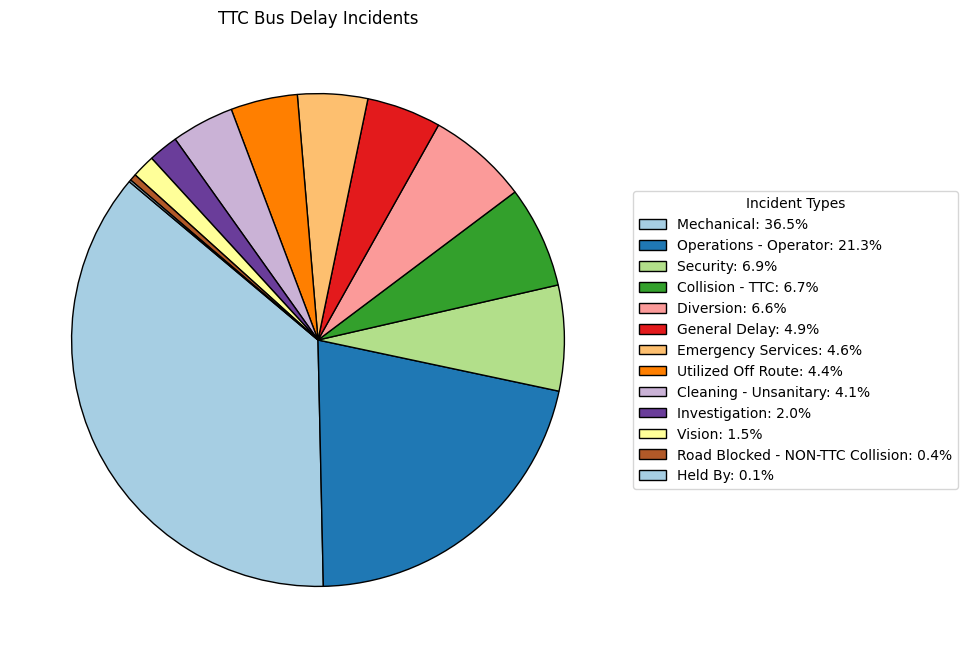

In [26]:
import matplotlib.pyplot as plt

# Count occurrences of each incident type
incident_counts = TTC_Delay_BUS['Incident'].value_counts()
labels = incident_counts.index
sizes = incident_counts.values

# Create pie chart
plt.figure(figsize=(8, 8))
wedges, texts = plt.pie(
    sizes, startangle=140, colors=plt.cm.Paired.colors, wedgeprops={'edgecolor': 'black'}
)

# Create legend with labels and percentages
legend_labels = [f"{label}: {size/sum(sizes)*100:.1f}%" for label, size in zip(labels, sizes)]
plt.legend(wedges, legend_labels, title="Incident Types", loc="center left", bbox_to_anchor=(1, 0.5))

plt.title('TTC Bus Delay Incidents')
plt.show()


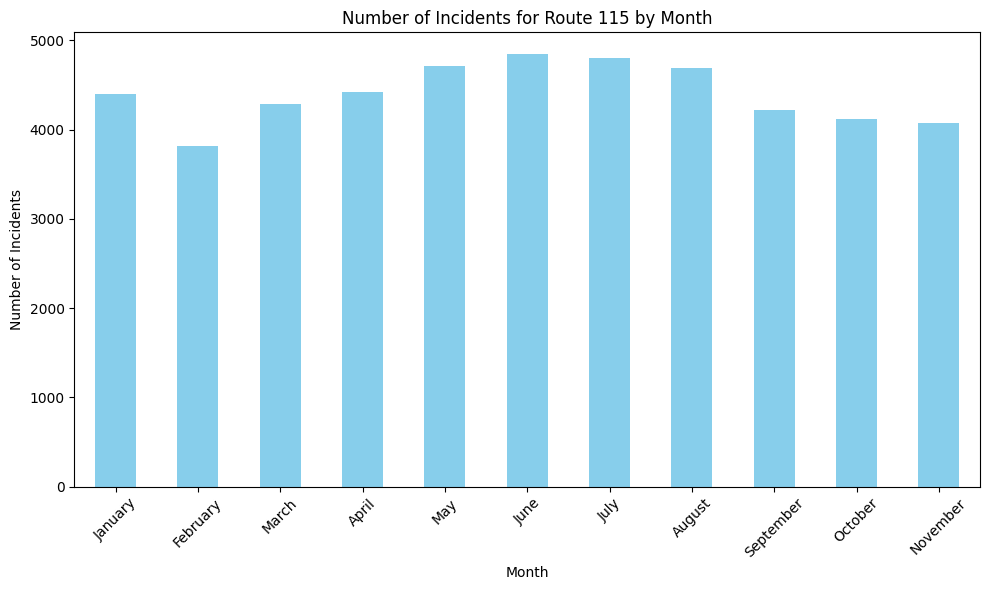

In [13]:
import matplotlib.pyplot as plt

# Filter the DataFrame for Route 41
route_41_data = TTC_Delay_BUS[TTC_Delay_BUS['Route'] == 52]
route_41_data = TTC_Delay_BUS.copy()
# Count the number of occurrences for each Month
date_counts = route_41_data.groupby('Month').size()

# Define the correct month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November']

# Reindex the counts to ensure the months are sorted correctly
date_counts = date_counts.reindex(month_order)

# Plot the result
plt.figure(figsize=(10, 6))
date_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Incidents for Route 115 by Month')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [11]:
route_count = TTC_Delay_BUS.groupby('Route').size().reset_index(name='Incident Count')

route_count_sorted = route_count.sort_values(by='Incident Count', ascending=False)

# Display the sorted result
route_count_sorted.head(40)



,Route,Incident Count
26,32,1541
46,52,1452
30,36,1329
29,35,1189
23,29,1172
56,63,971
88,95,901
95,102,894
78,85,864
48,54,786
